# Questão 4

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Carregar a aba 'dados' para inspecionar os dados
df = pd.read_excel('./embrapii_processo seletivo_analista dados senior_questao04.xlsx', sheet_name='dados')

df_anual = df.groupby("ano")\
.agg({
    'novos_projetos_contratados': 'sum',
    'valor_projetos_contratados': 'sum',
    'projetos_concluidos': 'sum'
}).reset_index()

anos = df_anual["ano"].values.reshape(-1,1)

print(df_anual)
print(anos)



    ano  novos_projetos_contratados  valor_projetos_contratados  \
0  2015                          70                1.312202e+08   
1  2016                         107                1.808952e+08   
2  2017                         212                3.548894e+08   
3  2018                         256                4.334363e+08   
4  2019                         215                3.348746e+08   
5  2020                         249                2.510959e+08   
6  2021                         375                4.668402e+08   
7  2022                         442                6.434097e+08   
8  2023                         481                8.166889e+08   
9  2024                         399                6.323850e+08   

   projetos_concluidos  
0                    1  
1                   30  
2                   84  
3                  137  
4                  186  
5                  169  
6                  252  
7                  263  
8                  327  
9           

## (i) número de projetos contratados

In [214]:
modelo_contratados = LinearRegression()
modelo_contratados.fit(anos,df_anual["novos_projetos_contratados"])
proj_contratados_2025 = modelo_contratados.predict([[2025]])[0]

## (ii) valor total dos projetos contratados

In [215]:
modelo_valor = LinearRegression()
modelo_valor.fit(anos,df_anual["valor_projetos_contratados"])
proj_valor_2025 = modelo_valor.predict([[2025]])[0]

## (iii) número de projetos concluídos

In [216]:
modelo_concluidos  = LinearRegression()
modelo_concluidos.fit(anos,df_anual["projetos_concluidos"])
proj_concluidos_2025 = modelo_concluidos .predict([[2025]])[0]

# Gráficos

## Configurar os dados para plotagem

In [217]:
anos_proj = np.append(df_anual['ano'], 2025)
contratados_proj = np.append(df_anual['novos_projetos_contratados'], proj_contratados_2025)
valor_proj = np.append(df_anual['valor_projetos_contratados'], proj_valor_2025)
concluidos_proj = np.append(df_anual['projetos_concluidos'], proj_concluidos_2025)

# Criar os gráficos
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

## Número de projetos contratados

In [218]:
plt.figure(figsize=(10, 6))
plt.plot(anos_proj[:-1], valor_proj[:-1], marker='o', label='Histórico', color='green')
plt.plot(anos_proj[-2:], valor_proj[-2:], linestyle='--', color='green', label='Projeção')
plt.plot(anos_proj[-1:], valor_proj[-1:], marker='o', color='lime', markersize=10, label='Previsão 2025')
for x, y in zip(anos_proj, valor_proj):
    plt.text(x, y, f"{y/1e6:.1f}M", fontsize=8, ha='center', va='bottom')
plt.title('Projeção de Valor Total dos Projetos para 2025', fontsize=14, pad=20)
plt.xlabel('Ano')
plt.ylabel('Valor (em milhões)')
plt.xticks(np.append(df_anual['ano'], 2025))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.subplots_adjust(bottom=0.4)
plt.figtext(0.5, 0.01, 'Figura 1: Projeção do Valor Total dos Projetos para 2025.', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig("grafico_valor_total_legenda.png")
plt.close()

## Valor total dos projetos contratados


In [219]:
plt.figure(figsize=(10, 6))
plt.plot(anos_proj[:-1], contratados_proj[:-1], marker='o', label='Histórico', color='blue')
plt.plot(anos_proj[-2:], contratados_proj[-2:], linestyle='--', color='blue', label='Projeção')
plt.plot(anos_proj[-1:], contratados_proj[-1:], marker='o', color='cyan', markersize=10, label='Previsão 2025')
for x, y in zip(anos_proj, contratados_proj):
    plt.text(x, y, f"{y:.0f}", fontsize=8, ha='center', va='bottom')
plt.title('Projeção do Número de Projetos Contratados para 2025', fontsize=14, pad=20)
plt.xlabel('Ano')
plt.ylabel('Número de Projetos Contratados')
plt.xticks(np.append(dados_anual['ano'], 2025))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.subplots_adjust(bottom=0.4)
plt.figtext(0.5, 0.01, 'Figura 2: Projeção do Número de Projetos Contratados para 2025.', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig("grafico_projetos_contratados_legenda.png")
plt.close()

## Número de projetos concluídos

In [220]:
plt.figure(figsize=(10, 6))
plt.plot(anos_proj[:-1], concluidos_proj[:-1], marker='o', label='Histórico', color='red')
plt.plot(anos_proj[-2:], concluidos_proj[-2:], linestyle='--', color='red', label='Projeção')
plt.plot(anos_proj[-1:], concluidos_proj[-1:], marker='o', color='pink', markersize=10, label='Previsão 2025')
for x, y in zip(anos_proj, concluidos_proj):
    plt.text(x, y, f"{y:.0f}", fontsize=8, ha='center', va='bottom')
plt.title('Projeção do Número de Projetos Concluídos para 2025', fontsize=14, pad=20)
plt.xlabel('Ano')
plt.ylabel('Número de Projetos Concluídos')
plt.xticks(np.append(dados_anual['ano'], 2025))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.subplots_adjust(bottom=0.4)
plt.figtext(0.5, 0.01, 'Figura 3: Projeção do Número de Projetos Concluídos para 2025.', ha='center', fontsize=10)
plt.tight_layout()
plt.savefig("grafico_projetos_concluidos_legenda.png")
plt.close()

# Exibição

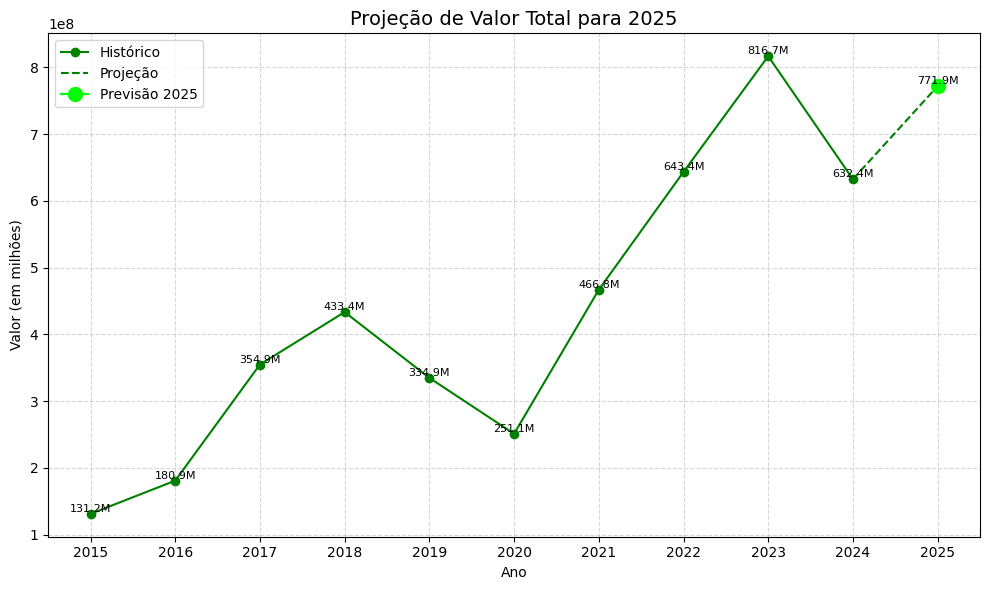

Projeção para 2025:
Valor total dos projetos contratados: R$ 771,909,283.42
Número de projetos contratados: 518
Número de projetos concluídos: 370


In [221]:
# Criar o gráfico
plt.figure(figsize=(10, 6))

# Linha sólida para o histórico
plt.plot(anos_proj[:-1], valor_proj[:-1], marker='o', label='Histórico', color='green')

# Linha tracejada para a projeção
plt.plot(anos_proj[-2:], valor_proj[-2:], linestyle='--', color='green', label='Projeção')

# Destacar o ponto de 2025
plt.plot(anos_proj[-1:], valor_proj[-1:], marker='o', color='lime', markersize=10, label='Previsão 2025')

# Adicionar os valores no gráfico
for x, y in zip(anos_proj, valor_proj):
    plt.text(x, y, f"{y/1e6:.1f}M", fontsize=8, ha='center', va='bottom')

# Configurações gerais do gráfico
plt.title('Projeção de Valor Total para 2025', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Valor (em milhões)')
plt.xticks(np.append(df_anual['ano'], 2025))  # Garantir que 2025 apareça no eixo
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Exibir projeção para 2025
print("Projeção para 2025:")
print(f"Valor total dos projetos contratados: R$ {projecao_valor_2025:,.2f}")
print(f"Número de projetos contratados: {proj_contratados_2025:.0f}")
print(f"Número de projetos concluídos: {proj_concluidos_2025:.0f}")

In [222]:
from fpdf import FPDF

# Criar o PDF
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Título
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Relatório Técnico: Projeção de Indicadores para 2025", ln=True, align='C')

# Introdução
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 10, txt=(
    "O presente relatório técnico visa apresentar as projeções para 2025 dos principais indicadores estratégicos da "
    "EMBRAPII, com base nos dados históricos de 2015 a 2024. Estes indicadores refletem diretamente o desempenho e "
    "a capacidade da EMBRAPII em promover inovação e desenvolvimento tecnológico no Brasil.\n\n"
    "Os indicadores analisados neste estudo são:\n"
    "1. Número de projetos contratados.\n"
    "2. Valor total dos projetos contratados.\n"
    "3. Número de projetos concluídos.\n\n"
    "As projeções foram realizadas utilizando técnicas de regressão linear para identificar tendências históricas e "
    "estimar os valores esperados para 2025. Este documento tem como objetivo subsidiar a diretoria na tomada de decisões "
    "estratégicas para o próximo ano.")
)

# Gráfico 1: Valor Total dos Projetos
pdf.add_page()
pdf.multi_cell(0, 10, txt=(
    "O gráfico abaixo ilustra a evolução do valor total dos projetos contratados ao longo dos anos, com uma projeção "
    "de atingir R$ 771,91 milhões em 2025. Esse crescimento reflete o contínuo fortalecimento da EMBRAPII como agente "
    "estratégico de inovação no Brasil, bem como o aumento no nível de investimento por parte de empresas e unidades EMBRAPII.\n\n"
    "A manutenção dessa tendência dependerá de estratégias voltadas para a ampliação de parcerias, diversificação de setores "
    "de atuação e fortalecimento da eficiência operacional."
))
pdf.image("grafico_valor_total_legenda.png", x=10, y=50, w=190)

# Gráfico 2: Número de Projetos Contratados
pdf.add_page()
pdf.multi_cell(0, 10, txt=(
    "O número de projetos contratados tem apresentado um crescimento constante nos últimos anos, com uma estimativa "
    "de 518 projetos em 2025. Este indicador é um reflexo direto da capacidade de engajamento da EMBRAPII com parceiros "
    "do setor privado e instituições de pesquisa.\n\n"
    "Esse crescimento deve ser acompanhado por ações estratégicas para garantir a qualidade dos projetos e atender à "
    "demanda crescente de inovação por parte das empresas. Isso inclui o desenvolvimento de novos mecanismos de captação "
    "e ampliação da visibilidade das soluções oferecidas pela EMBRAPII."
))
pdf.image("grafico_projetos_contratados_legenda.png", x=10, y=50, w=190)

# Gráfico 3: Número de Projetos Concluídos
pdf.add_page()
pdf.multi_cell(0, 10, txt=(
    "A projeção para o número de projetos concluídos em 2025 é de 370, evidenciando a maturidade e eficiência do "
    "processo operacional da EMBRAPII. Esse indicador é crucial para demonstrar a capacidade de entrega e a geração "
    "de valor para parceiros e stakeholders.\n\n"
    "Para sustentar esse crescimento, será essencial investir na estruturação de processos internos e no suporte técnico "
    "às unidades EMBRAPII, garantindo a conclusão dos projetos dentro do prazo e com os resultados esperados."
))
pdf.image("grafico_projetos_concluidos_legenda.png", x=10, y=50, w=190)

# Conclusão
pdf.add_page()
pdf.multi_cell(0, 10, txt=(
    "Os resultados apresentados neste relatório demonstram um cenário promissor para a EMBRAPII em 2025, com projeções "
    "que apontam para o crescimento contínuo em seus principais indicadores estratégicos. Este cenário reforça a importância "
    "da EMBRAPII como agente de transformação no ecossistema de inovação no Brasil.\n\n"
    "Recomenda-se à diretoria considerar os seguintes pontos como prioritários no planejamento estratégico para 2025:\n"
    "- Ampliação das parcerias estratégicas com empresas e instituições de pesquisa.\n"
    "- Diversificação dos setores de atuação para alcançar novos mercados.\n"
    "- Fortalecimento da capacidade operacional para atender à demanda crescente de projetos.\n"
    "- Monitoramento contínuo do desempenho para ajustes rápidos às demandas do mercado.\n\n"
    "A EMBRAPII está posicionada para consolidar ainda mais sua relevância no cenário nacional de inovação, sendo fundamental "
    "manter o foco em ações estratégicas que assegurem a sustentabilidade e o impacto de suas operações no longo prazo."
))

# Salvar o PDF
pdf.output("relatorio_tecnico_projecao_2025_completo.pdf")


''